In [1]:
from unidec_modules.v3_SeqChrom import *

In [2]:
eng = SeqChrom()


UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


Added in option to load multipe mzml files into engine before metaunidec processing.

In [3]:
directory = "D:/220701 mass spec/processed/srt mutants 4 hours"

plate_map = map_path = "C:\\Users\\cm19ljc\\Documents\\GitHub\\UniDec\\reaction maps\\Srt mutant PanZ labelling 4 hours obf.xlsx"

In [4]:
eng.load_multi_single(directory, t0 = 2.4, t1 = 2.8, )

Error: No HDF5 file present. Please create an HDF5 file first

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Reading mzML: D:/220701 mass spec/processed/srt mutants 4 hours\220107 A 4 hrs_340688_GA1_01_82117.d.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: D:/220701 mass spec/processed/srt mutants 4 hours\220107 A 4 hrs_340688_GA1_01_82117.d.mzML.gz
Error getting TIC in mzML; trying to make it...


C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_modules\mzMLimporter.py:311: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.data = np.array(self.data)


Imported Data. Constructing TIC
Done
701 2
Noise Level: 0.026119257607253046 Window: 0.2
Bad Peak [0.755017   0.23080761] 0.016599999999999948 [0.755017, 0.771617]
2.58628 0.2532799999999997
3.58303 0.13702999999999976
Getting scans: [397, 492]
Length merge axis: 42943
0
1

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Reading mzML: D:/220701 mass spec/processed/srt mutants 4 hours\220107 B 4 hrs_340689_GA2_01_82118.d.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: D:/220701 mass spec/processed/srt mutants 4 hours\220107 B 4 hrs_340689_GA2_01_82118.d.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done
695 2
Noise Level: 0.04907300961405152 Window: 0.2
Bad Peak [0.75495    0.19318221] 0.029066999999999954 [0.75495, 0.784017]
1.80142 0.

In [5]:
# TIC/time point invalidation 
# add option to delete index in TIC data 
# add option to invalidate specific time/species 
# add option to plot bar chart instead of scatter/line - especially useful for comparison of diff species

n.b. lowering the peakthresh may result in noise being recognised as a peak and thereby generating false data.
>start high e.g. 0.1 and lower as appropriate 

In [6]:
# eng.update_config(masslb = 10000, massub = 90000, peakthresh = 0.01, datanorm = 0, 
#                  beta = 0, peaknorm = 1, exnorm = 1, numit=50, numz=50,
#                  endz=50, startz=1,zzsig=1.0, psig=1.0,mzsig=1.0,psfun=0,msig=0.0,molig=0.0,
#                  massbins=1.0,mtabsig=0.0, subbuff=0.0, subtype=2, mzbins=0.0, 
#                  peakwindow=10.0, smooth = 0)
eng.update_config(masslb = 10000, massub = 20000)
eng.process_data()
eng.run_unidec()
eng.pick_peaks()
eng.integrate_all()

Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 0.08854529999999983
Execution Time: 7.9858534
Execution Time: 0.28028309999999834
Peak info saved to: UniDec_Figures_and_Files\.hdf5_extracts.txt


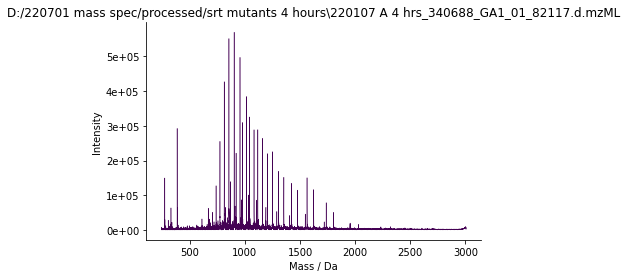

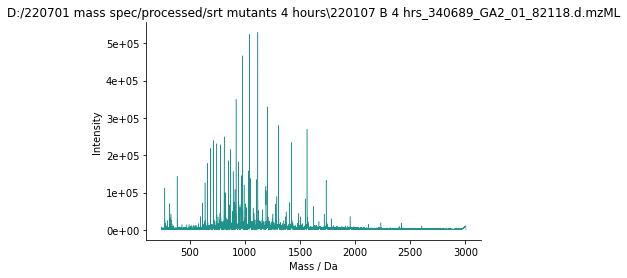

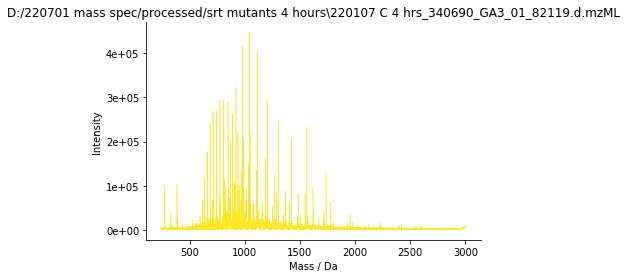

In [7]:
eng.plot_all(dtype = 'data2', combine = False, cmap = 'viridis')

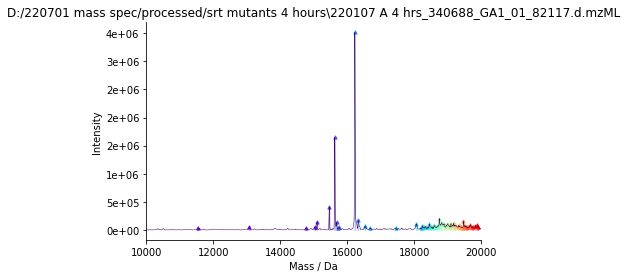

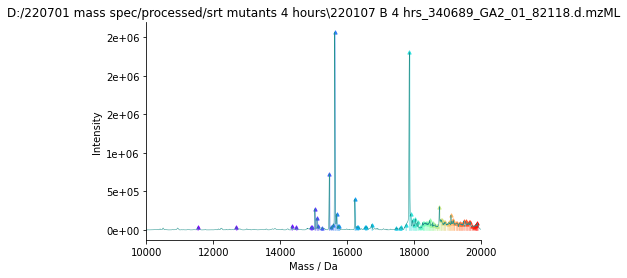

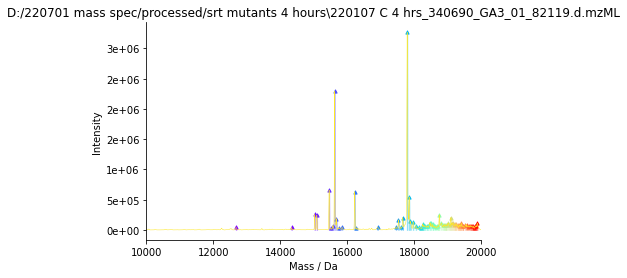

In [8]:
eng.plot_all(dtype = 'massdat', combine = False, cmap = 'viridis', xlim = [10000, 20000])

In [9]:
eng.upload_map(map_path)

(  Reaction     Species  Concentration Units     Mass Reagent_Type Sequence
 0     PanZ  Unlabelled          100.0    uM  16223.0      Protein      NaN
 1     PanZ    Labelled            NaN    uM  15623.0      Protein      NaN
 2     PanZ   Species 3            NaN    uM  15029.0      Protein      NaN
 3     PanZ   Species 4            NaN   NaN  15459.0      Protein      NaN,
             Type Reaction Time Sortase  \
 Well ID                                  
 1        Protein     PanZ    4     H7D   
 2        Protein     PanZ    4      7M   
 3        Protein     PanZ    4      6M   
 
                                           Filename  Species  Valid  
 Well ID                                                             
 1        220107 A 4 hrs_340688_GA1_01_82117.d.mzML      NaN   True  
 2        220107 B 4 hrs_340689_GA2_01_82118.d.mzML      NaN   True  
 3        220107 C 4 hrs_340690_GA3_01_82119.d.mzML      NaN   True  )

In [10]:
eng.pmap

,Type,Reaction,Time,Sortase,Filename,Species,Valid
Well ID,,,,,,,
1,Protein,PanZ,4,H7D,220107 A 4 hrs_340688_GA1_01_82117.d.mzML,NaN,True
2,Protein,PanZ,4,7M,220107 B 4 hrs_340689_GA2_01_82118.d.mzML,NaN,True
3,Protein,PanZ,4,6M,220107 C 4 hrs_340690_GA3_01_82119.d.mzML,NaN,True


In [11]:
eng.speciesmap

,Reaction,Species,Concentration,Units,Mass,Reagent_Type,Sequence
0,PanZ,Unlabelled,100.0,uM,16223.0,Protein,NaN
1,PanZ,Labelled,NaN,uM,15623.0,Protein,NaN
2,PanZ,Species 3,NaN,uM,15029.0,Protein,NaN
3,PanZ,Species 4,NaN,NaN,15459.0,Protein,NaN


In [12]:
eng.process_maps(groupby = 'Reaction', variable = 'Sortase', matchfilenames = True)

In [13]:
len(eng.data.spectra)

3

In [14]:
eng.pmap2

,Type,Reaction,Time,Sortase,Filename,Species,Valid,Labelled,Species 3,Species 4,Unlabelled,Spectra
Well ID,,,,,,,,,,,,
1,Protein,PanZ,4,H7D,220107 A 4 hrs_340688_GA1_01_82117.d.mzML,"[Labelled, Species 3, Species 4, Unlabelled]",True,"<Labelled(Reaction = PanZ, Species = Labelled,...","<Species 3(Reaction = PanZ, Species = Species ...","<Species 4(Reaction = PanZ, Species = Species ...","<Unlabelled(Reaction = PanZ, Species = Unlabel...",<metaunidec.mudstruct.Spectrum object at 0x000...
2,Protein,PanZ,4,7M,220107 B 4 hrs_340689_GA2_01_82118.d.mzML,"[Labelled, Species 3, Species 4, Unlabelled]",True,"<Labelled(Reaction = PanZ, Species = Labelled,...","<Species 3(Reaction = PanZ, Species = Species ...","<Species 4(Reaction = PanZ, Species = Species ...","<Unlabelled(Reaction = PanZ, Species = Unlabel...",<metaunidec.mudstruct.Spectrum object at 0x000...
3,Protein,PanZ,4,6M,220107 C 4 hrs_340690_GA3_01_82119.d.mzML,"[Labelled, Species 3, Species 4, Unlabelled]",True,"<Labelled(Reaction = PanZ, Species = Labelled,...","<Species 3(Reaction = PanZ, Species = Species ...","<Species 4(Reaction = PanZ, Species = Species ...","<Unlabelled(Reaction = PanZ, Species = Unlabel...",<metaunidec.mudstruct.Spectrum object at 0x000...


invalidate data using eng.invalidate()

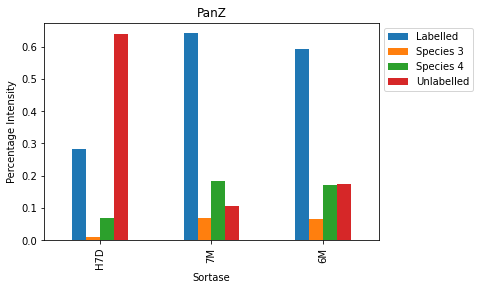

In [15]:
eng.peak_match(silent = True)
eng.normalise_peaks(silent = True)

eng.plot_data(plot_type='bar', groupby='Sortase')

           Labelled  Species 3  Species 4  Unlabelled
Sortase 1  0.282308   0.011241   0.069044    0.637407
Sortase 2  0.641564   0.068942   0.183124    0.106370
Sortase 3  0.590977   0.066727   0.169468    0.172828


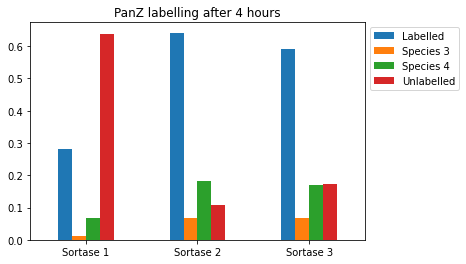

In [27]:
df = eng.data_df['PanZ']
print(df)
df.index = ['Sortase 1', 'Sortase 2', 'Sortase 3']
df.plot.bar(rot = 0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title("PanZ labelling after 4 hours")
plt.show()